# K Nearest Neighbors

KNN is a classification algorithm. Predicts class of test object by looking at objects next to it.

Pros: 
Very simple
Training is easy
Works with any number of classes
Easy to add more data
Few parameters (K(how many points you are looking at that are next to new test point), Distance Metric)

Cons:
High prediction cost (worse for large data sets)
Not good for high dimensional data (many features)
categorical features don't work well

Common interview task for data scientists is to be given anonymized data and attempt to classify it, without knowing context. Not knowing what the columns represent.

Classify the new data point. Associated with neighbor points. Horse and Dog height and weight below.

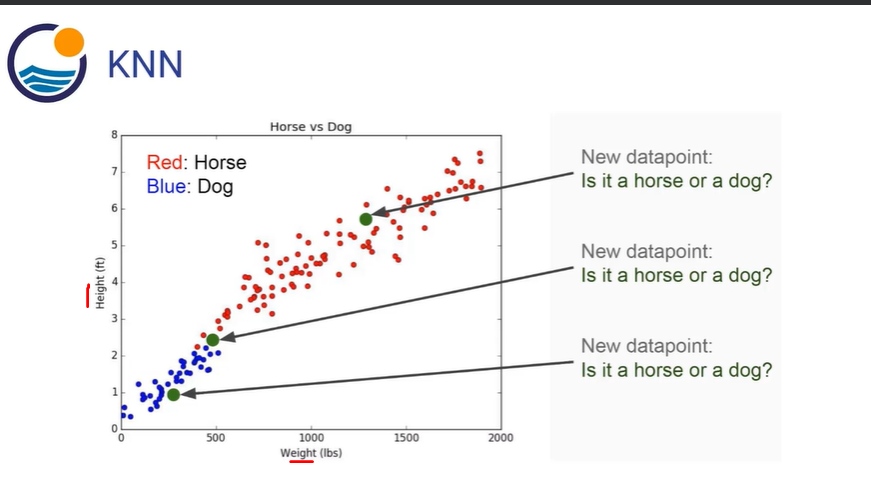

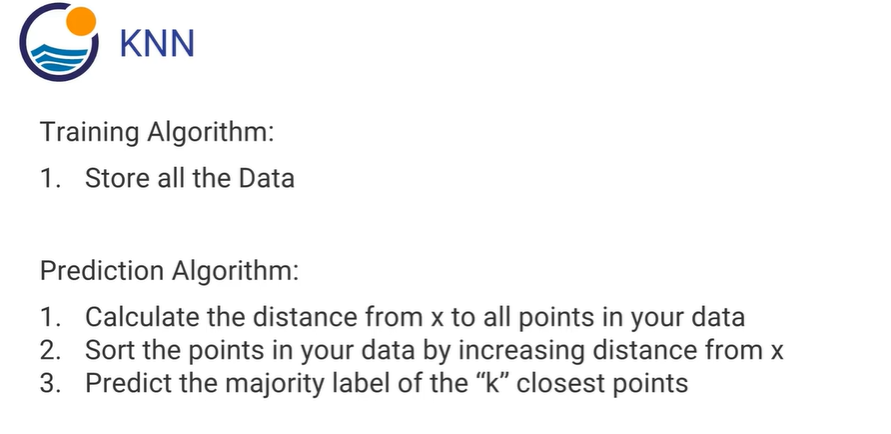

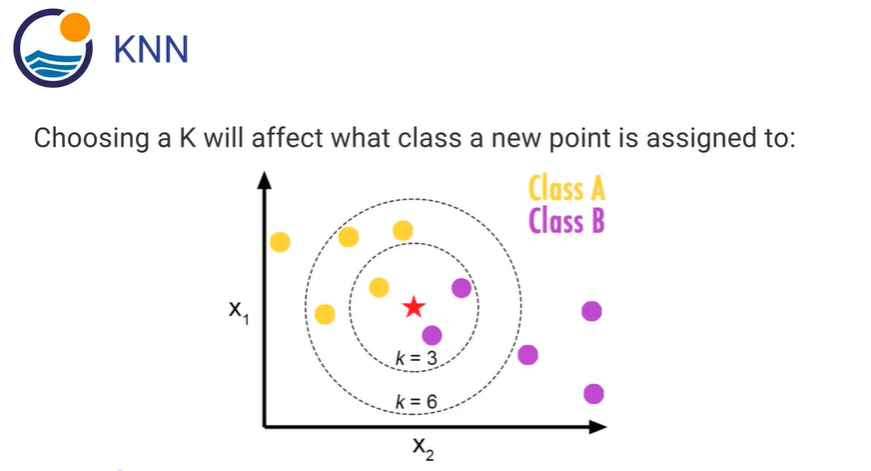

Below shows higher K value, results in cleaner cutoff even though we will mislabel some points

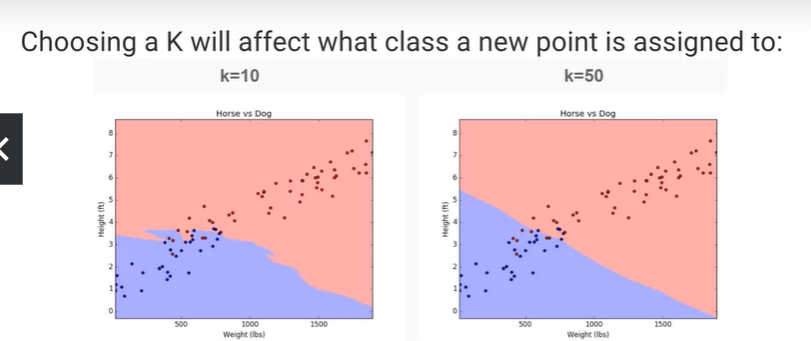

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data', index_col=0)

In [3]:
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

In [4]:
# try to standardize everything to standard scale
# anything variables on large scale has big effect on distance of observations

from sklearn.preprocessing import StandardScaler

In [5]:
# create instance of standard scaler
# just like you would with any ML algorithm

scaler = StandardScaler()

In [6]:
# then fit it to the data
# but not the target class

scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [7]:
# create variable
# call transform method on scaler object
# transform method performs standarization by centering and scaling 
# pass in data features
# gives you array of values below


scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [8]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [9]:
# use scaled feature variable to re-create a feature dataframe
# slice notation, everything but the last one (Target Class)

df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [11]:
# this is ready to be put into a ML algorithm like K Nearest Neighbors


df_feat.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

In [12]:
# train test split

from sklearn.model_selection import train_test_split

In [13]:
X = df_feat  # or scaled_features
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
# now we use K Nearest Neighbors
# model to predict if someone will be in target class or not

# elbow method to choose k value

# start with import model KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

In [15]:
# create instance of KNN Classifier
# n is number of neighbors we want for this model

knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
# fit the model then pass in training data

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
# grab predctions for evaluation
# pass in test data

pred = knn.predict(X_test)

pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

In [19]:
# do a prediction and evaluation

from sklearn.metrics import classification_report, confusion_matrix

In [20]:
# print out confusion matrix and classifcation

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [21]:
# now we use ELBOW METHOD to choose Correct K Value
# iterate empty list with many models with different k values to see lowest error rate

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # fit to training set
    knn.fit(X_train, y_train)
    
    # predict off the test set
    pred_i = knn.predict(X_test)
    
    # append mean of pred_i not equal to y_test
    
    # last part is average of where predictions were not equal to the actual test values
    # take numpy mean of that and append that error rate to the list
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

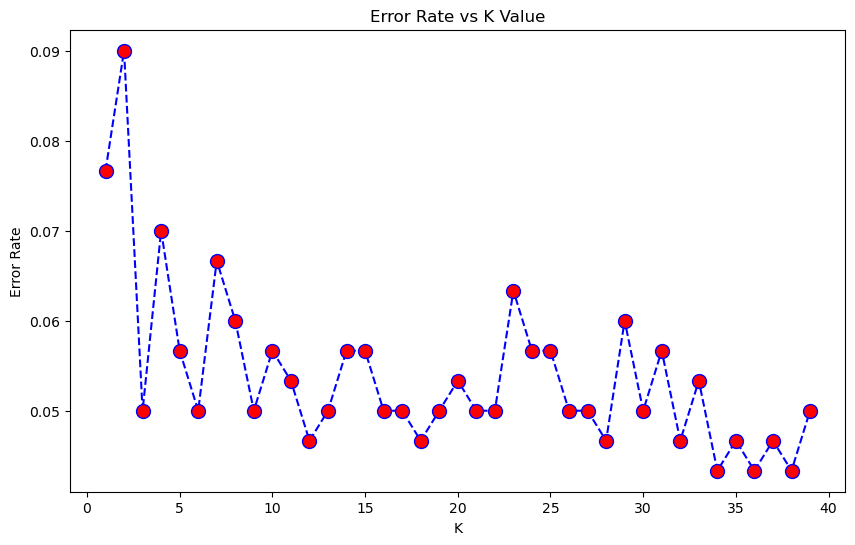

In [25]:
# plot this result above out

plt.figure(figsize=(10,6))

# plot range of 1 -40, vs error rate  then added arguements

plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Looking at this error rate, it starts high and then lowers error rate around 20's mark, maybe 35 mark too. But it bounces up and down before it gets to the higher k numbers. So lets choose 17

.05 and .08 error rate on the y axis are already pretty good error rates anyway.

In [23]:
# this is the above but unreadable

error_rate

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

In [26]:
# print out confusion matrix and classifcation
# lets compare these to our orignal confusion matrix
# first one above had 92% f1 score which is already good

# choose a higher k value so we can compare, the 17

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



Now the confusion matrix shows we were able to classify a few more points correctly. We are at 95%

# Decesion Trees and Random Forsets

#### Decesion Tree

Example: A friend only shows up to play tennis when certain weather factors are good enough. Can build decesion tree. Windy Yes no. Humidity Yes No.

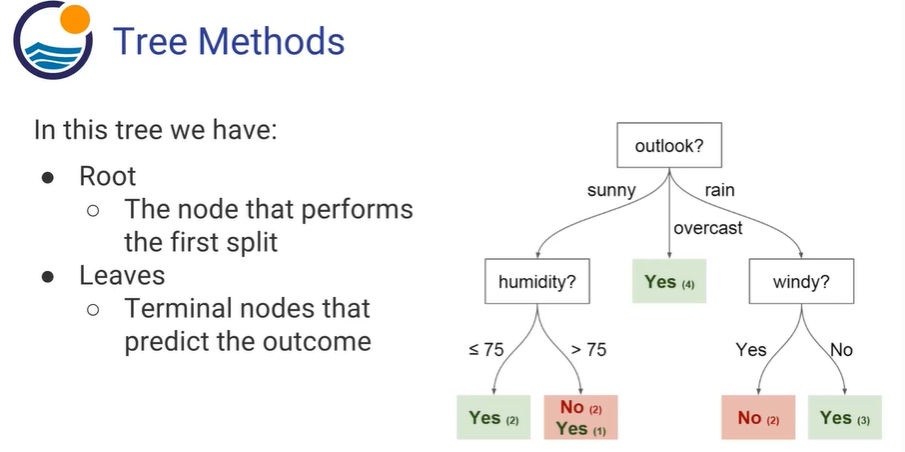

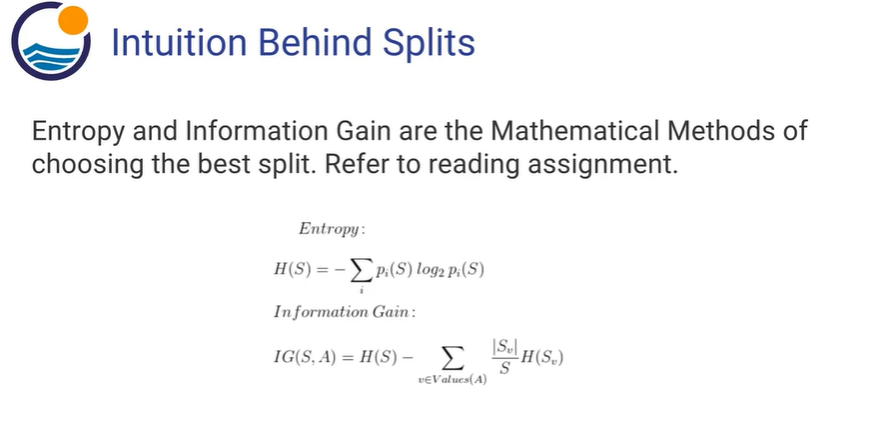

#### Random Forest

To improve performance, we can use many trees with random sample of features chosen as the split

A new random sample of features is chosen for every single tree at every single split

For classification, m is typically chosen to be the square root of p.

Suppose there is One Strong Feature in the data set. When using 'bagged' trees, most of the trees will use that feature as the top split, resulting in an ensemble of similar trees that are Highly Correlated.

Averaging highly correlated quantites does not significantly reduce variance.

By randomly leaving out candidate features from each split, Random Forests "decorrelates" the trees, such that the average process can reduce the variance of thte resulting model.

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df = pd.read_csv('kyphosis.csv')

df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [31]:
df.info

<bound method DataFrame.info of    Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]>

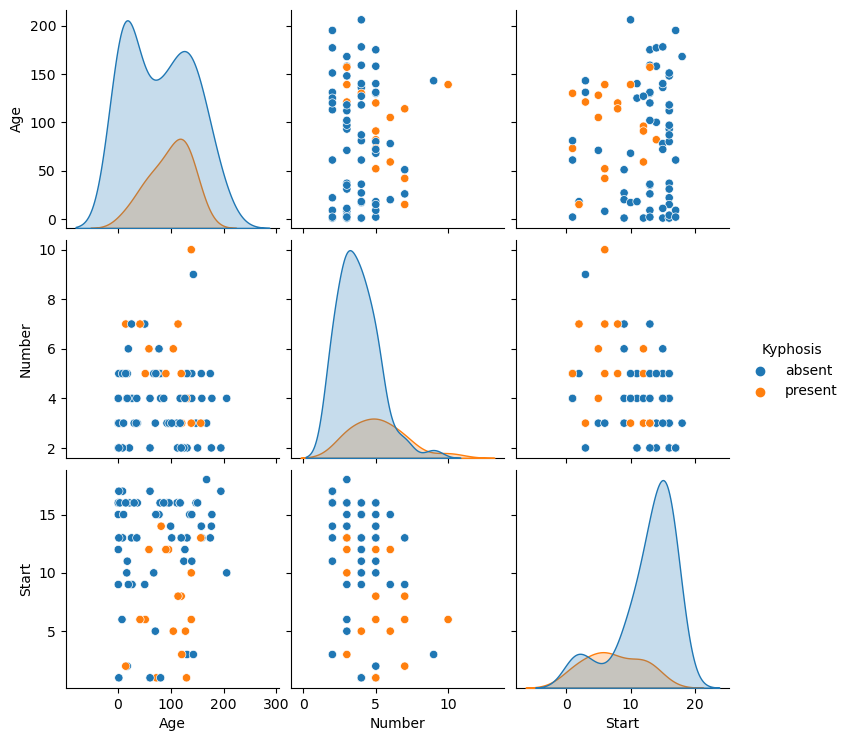

In [32]:
sns.pairplot(df, hue='Kyphosis')

In [33]:
# lets start ML model, train test split our data

from sklearn.model_selection import train_test_split

In [42]:
# X data is everything BUT the target

X = df.drop('Kyphosis', axis=1)

In [43]:
# target 

y=df['Kyphosis']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
# training a single Decesion Tree

from sklearn.tree import DecisionTreeClassifier

In [47]:
# create a model called dtree
# intstantiate it here

dtree = DecisionTreeClassifier()

In [48]:
# we will fit the model to the training data

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
# predictions variable model.predict

predictions = dtree.predict(X_test)

In [50]:
# import classification report and confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[12  5]
 [ 6  2]]


              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



#### Now let do Random Forest Algorithm

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
# create random forest model
# can play around with estimator numbers
# 200 about normal

rfc = RandomForestClassifier(n_estimators=200)

In [54]:
# fit training data

rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [55]:
# predictions off test data

rfc_pred = rfc.predict(X_test)

In [56]:
# print confusion matrix and classification metrics

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[12  5]
 [ 6  2]]


              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [57]:
# value count, we have an unbalanced dataset

df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

Note:

For for visualization of Decesion Trees, can use the libary pydot. It doesn't come with anaconda distribution.

More in the lecture notes on this subject.

Have to download software from graphviz.org (seperate from python)

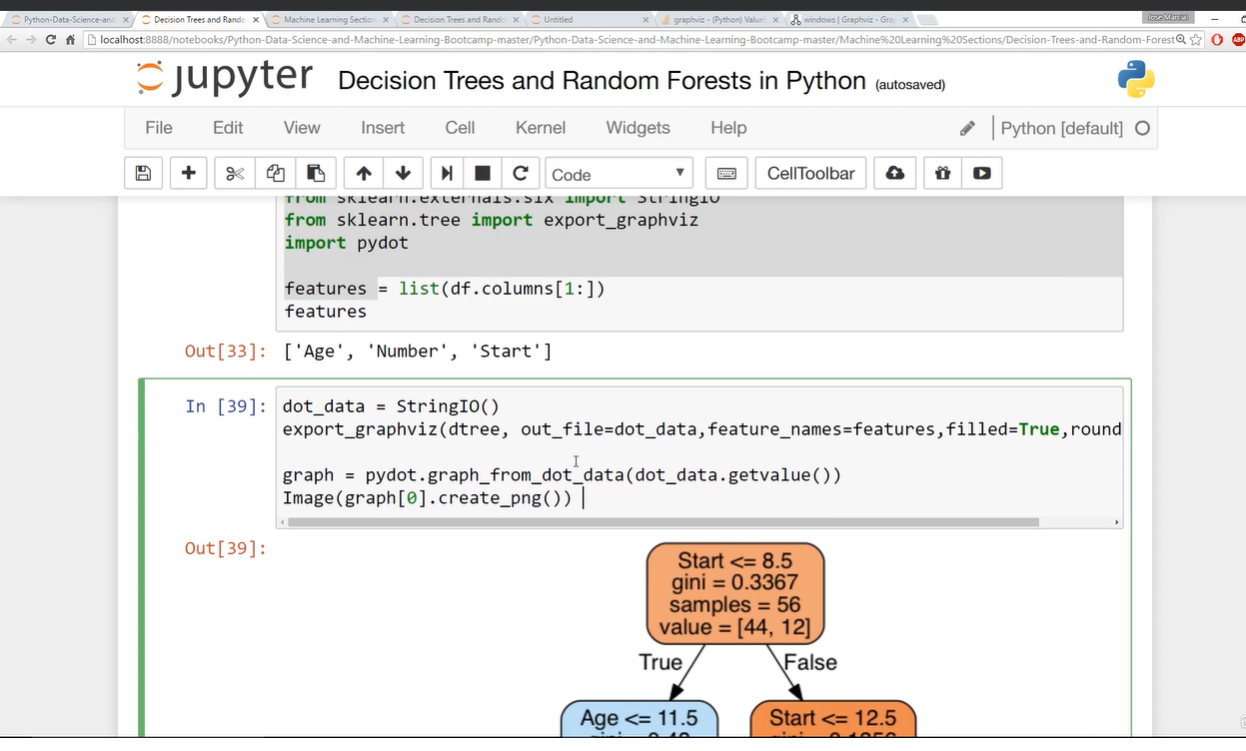

# Support Vector Machines

Support Vector Machines (SVMs) are supervised learning models with associated learning algorithms that analyze data and recognize patterns, used for classification and regression analysis.

Given a set of training examples, each marked for belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples into one category or the other, making it a non-probabilistic binary linear classifier.

An SVM Nodel is a representation of the examples as points in space, mapped so that the examples of the seperate categories are divided by a clear gap that is as wide as possible.

New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall on.

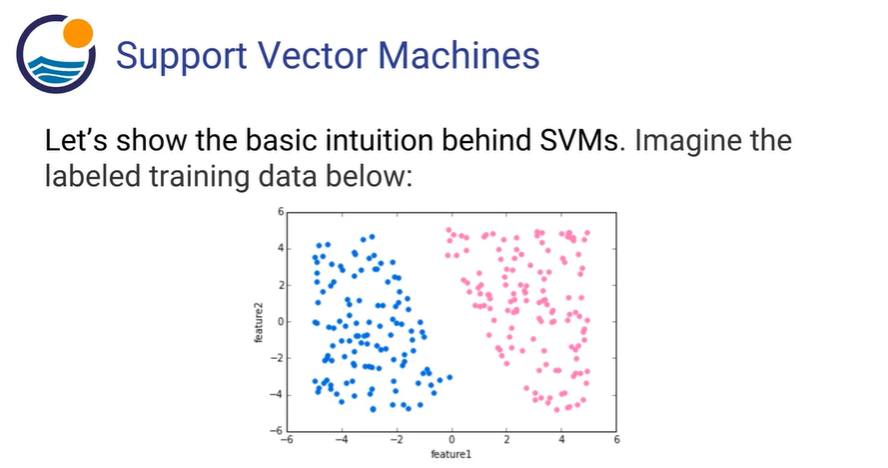

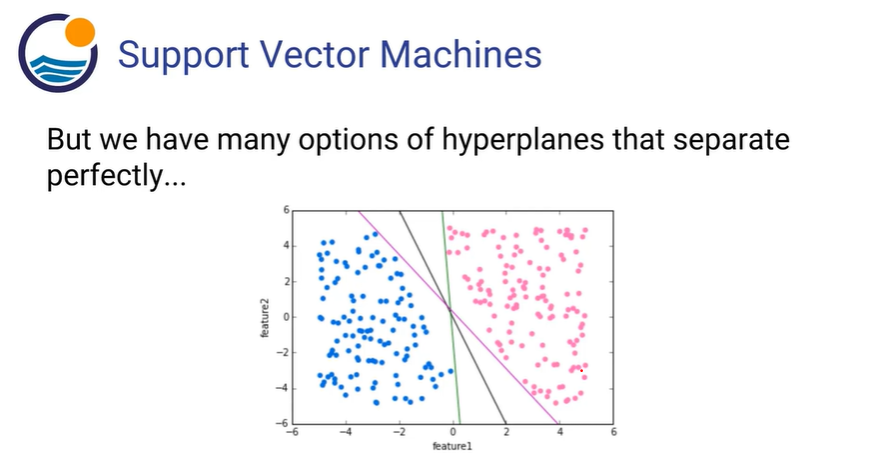

We want to choose a hyperplane that maximizes the margin between the classes.

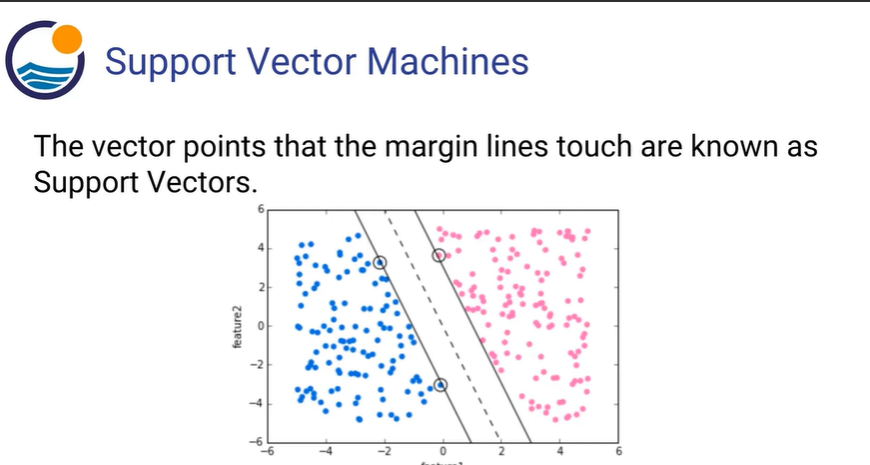

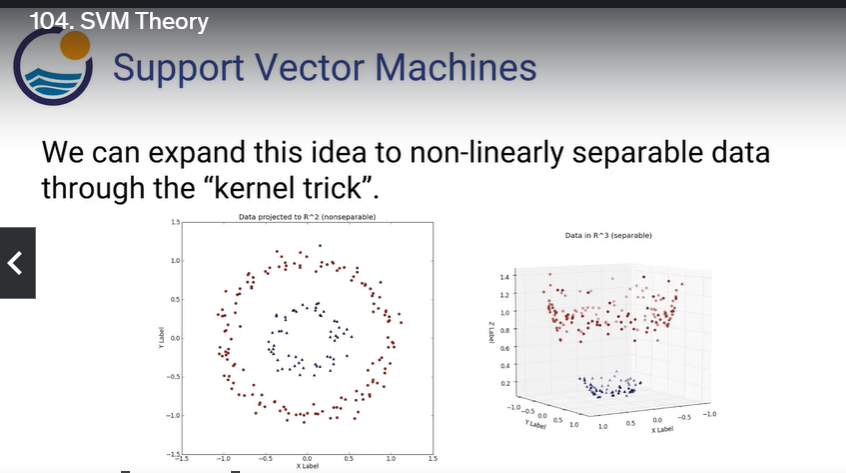

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [59]:
# grab the data

from sklearn.datasets import load_breast_cancer

In [62]:
cancer = load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [63]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [65]:
# create dataframe with these keys

df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

df_feat.head(2)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  

[2 rows x 30 columns]

In [66]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [67]:
cancer['target']     #(0 is malignant, 1 is benign)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
# explore using seaborn or matplotlib


In [68]:
# train test split
# X are features
# y is target

X = df_feat
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [70]:
# train the model( Support Vector Classifier)

from sklearn.svm import SVC

# instantiate the model

model = SVC()

In [71]:
# fit the model with training data

model.fit(X_train,y_train)

SVC()

In [72]:
# predictions off test data

predictions = model.predict(X_test)

In [73]:
# import in classification report and confsion matrix

from sklearn.metrics import classification_report, confusion_matrix

In [74]:
# print them out from model

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 56  10]
 [  3 102]]


              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



#### Grid Search for SVM

In [76]:
# from model selection family
# we will be using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [77]:
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.001]}

In [78]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [79]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.637 total time=   0.0s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.637 total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.637 total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.637 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.613 total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001]},
             verbose=3)

In [80]:
# finding the best parameters from above

grid.best_params_

{'C': 1, 'gamma': 0.001}

In [81]:
grid.best_estimator_

SVC(C=1, gamma=0.001)

In [82]:
grid_predictions = grid.predict(X_test)

In [83]:
# print them out from model with grid_predictions

print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 59   7]
 [  5 100]]


              precision    recall  f1-score   support

           0       0.92      0.89      0.91        66
           1       0.93      0.95      0.94       105

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



# K Means Clustering Algorithm

K Means Clustering is an unsupervised (unlabeled data) learning algorithm that attempts to group similar clusters together in your data.

Goal is to divide data into distinct groups such that observations within each group are similar.

-We choose number of clusters "K"

-randomly assign each point to a cluster

-Until clusters stop changing, repeat (for each cluster, compute the cluster centroid by taking the mean vector of points in the cluster) (assign each data point to the cluster for which the centroid is the closest.)

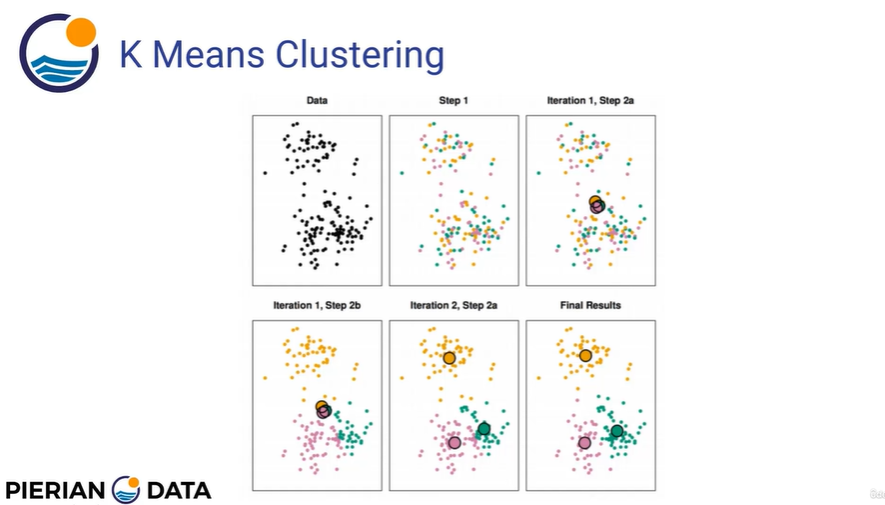

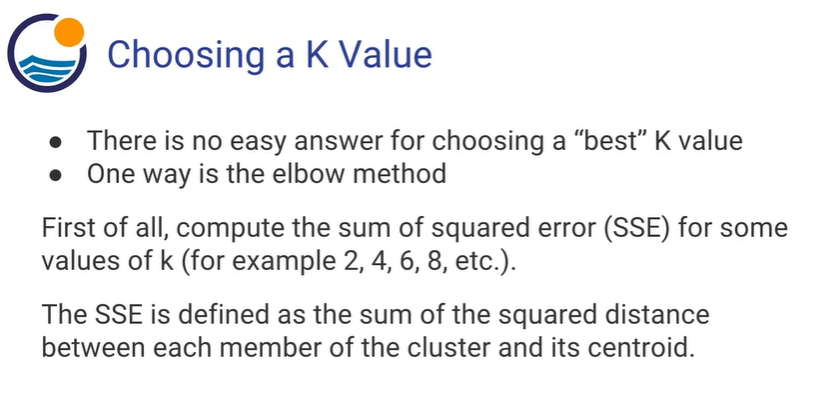

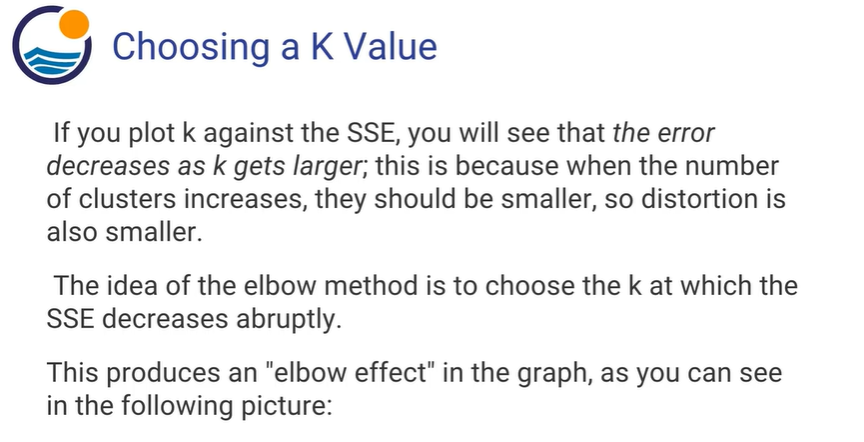

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [86]:
# use SkiKit-learn to generate some artifical data
# import make_blobs METHOD

from sklearn.datasets import make_blobs

In [87]:
# 200 samples, 2 features, centers (to the blobs) is 4, standard deviation is 1.8, random state is 101 so our blobs are the same 

data = make_blobs(n_samples=200, n_features=2, centers = 4, cluster_std=1.8, random_state=101)

data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [90]:
# if you grab the first element in the above tuple, we have a numpy array

data[0]

array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1.

In [91]:
# this shows 200 samples by two features

data[0].shape

(200, 2)

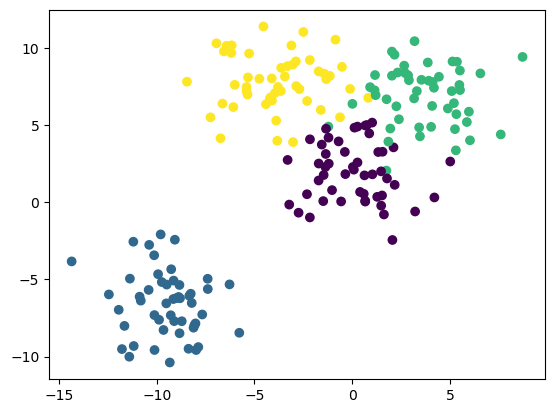

In [94]:
# plot out blobs
# data 0, grab all rows in first column, plot that aginast data 0 and all rows in second column
# added in c=data[1] which is the centers it belongs to
# can add in cmap = 'rainbow' for new colors

plt.scatter(data[0][:,0], data[0][:,1], c=data[1])

In [93]:
# this is the second column
# it shows the cluster it belongs to

data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

In [95]:
# use sklearn to create k means clustering algorithm
# K Means is Unsupervised

# the algorithm will start by randomly assigning each observation to a cluster.Finds a centroid of each cluster
# after that the algorithm will iterate through the two steps from above.
# reassigns data points to cluster which the centriod is closer
# then calcualtes new centriod for each cluster
# repeats that till cluster variation cant be reduced any further


from sklearn.cluster import KMeans

In [96]:
# lets create a lowercse kmeans object
# have to know the cluster beforehand

kmeans = KMeans(n_clusters=4)


# fit it to the Features which is data[0]

kmeans.fit(data[0])

C:\Users\D8ISU4A\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\D8ISU4A\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [97]:
# this will report back

###   kmeans. (object) (dot)   then shows many methods and attributes

# such as finding the cluster centers, returns array

kmeans.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664]])

In [98]:
# this is attrivute of labels the algorithm belives to be true of the clusters

kmeans.labels_

array([2, 0, 3, 0, 0, 1, 0, 3, 0, 3, 2, 3, 0, 0, 2, 3, 0, 3, 1, 2, 1, 3,
       3, 1, 2, 1, 1, 3, 0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 0, 2, 3, 1, 3, 3, 2, 0, 3, 1, 2, 3, 3, 2, 0, 1, 0, 1, 2, 0, 3,
       1, 0, 0, 1, 0, 3, 1, 3, 1, 0, 0, 3, 2, 3, 3, 1, 0, 1, 3, 3, 3, 2,
       3, 1, 1, 1, 1, 3, 3, 1, 0, 2, 1, 0, 3, 1, 3, 3, 0, 3, 1, 0, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 0, 2, 3, 1, 2, 2, 2,
       3, 1, 1, 2, 0, 2, 0, 3, 1, 0, 1, 2, 2, 0, 3, 1, 2, 2, 2, 2, 3, 0,
       3, 2, 0, 0, 0, 3, 0, 3, 3, 2, 1, 2, 3, 0, 2, 3, 0, 3, 2, 0, 3, 2,
       0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 0, 0, 2, 1, 3, 0, 0,
       1, 3])

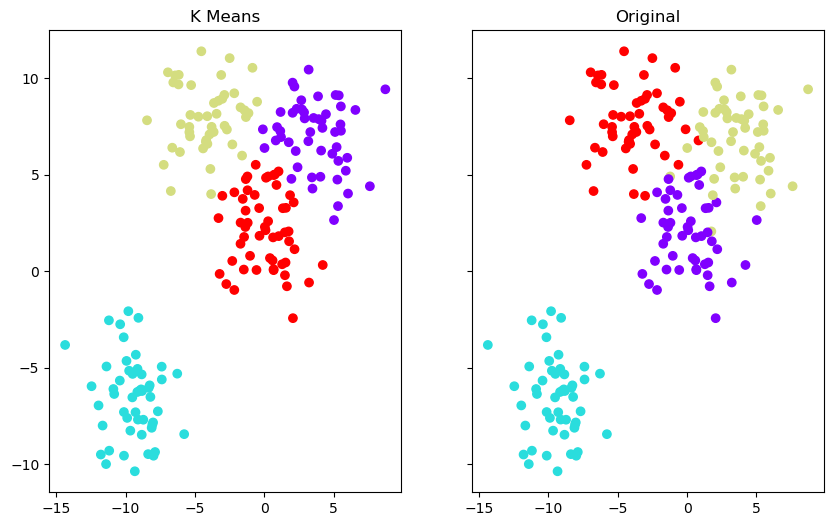

In [99]:
# now we can compare the correct labels from data[1] and the kmeans labels above is the "predicted" labels
# but this is unsupervised, so we wouldnt use it to predict labels ,we use it to FIND lables

# plot out how it compares to original



# we are creating subplots of 1 row by 2 columns 
# sharey = True allows it to share the same AXIS
# using tuple unpacking to grab the two set of axis

fig , (ax1,ax2) = plt.subplots(1,2, sharey = True, figsize=(10,6))


# this first axis is plotting original data (((data[0][:,0], data[0][:,1])))  and color that data based off what algorithm thought the labels should look like ((c=kmeans.labels_))
ax1.set_title('K Means')
# scatter plot, color defined by kmeans.lables_
# and added cmap = colors
ax1.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_, cmap='rainbow')


# this second axis also plots the original data  (((data[0][:,0], data[0][:,1]))), but its going to color that data by their actual factually correct blob assignments ((c=data[1]))
ax2.set_title('Original')
# scatter plot, color defined by kmeans.lables_
# cmap = 'rainbow' for both
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')

# PCA (Principal Component Analysis) Algorithm

Principal Component Analysis (PCA) is an unsupervised statiscal technique used to examine the interrelations among a set of variables in order to identify the underlying strucutre of those variables. Mostly used for component reduction.

It is also known as a general Factor Analysis

Where regression determines a line of best fit to a data set, factor analysis determines several orthogonal lines of best fit to the data set

Orthogonal means 'at right angles'
- actually the lines are perpendicular to each other in n-dimensional space

n-Dimensional Space is the variable sample space
- There are as many dimensions as there are variables, so in a data set with 4 variables the sample space is 4-dimensional

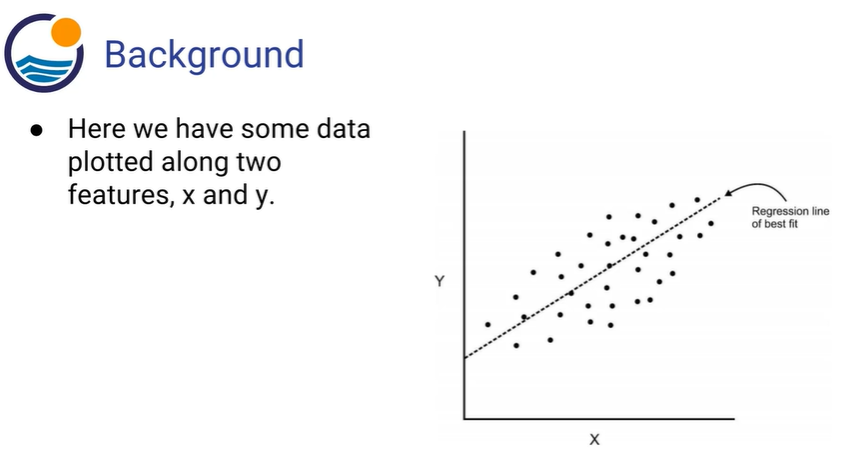

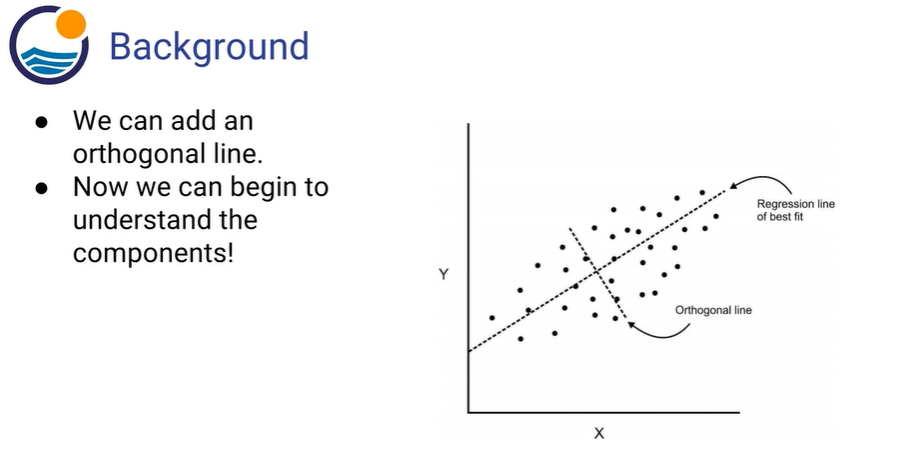

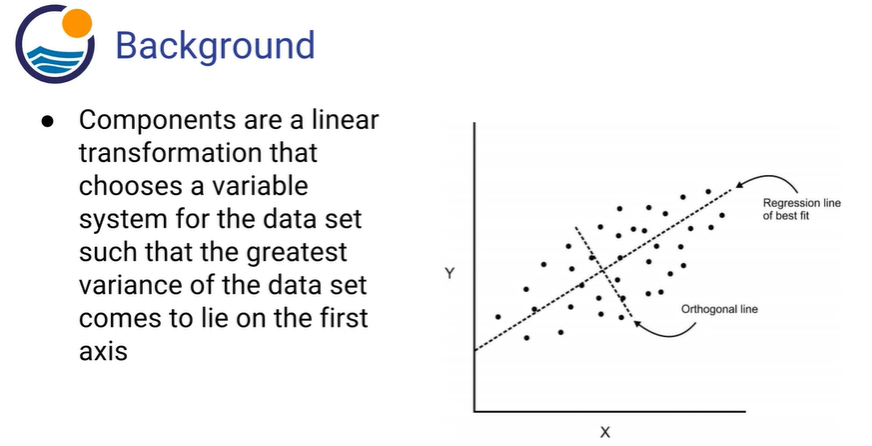

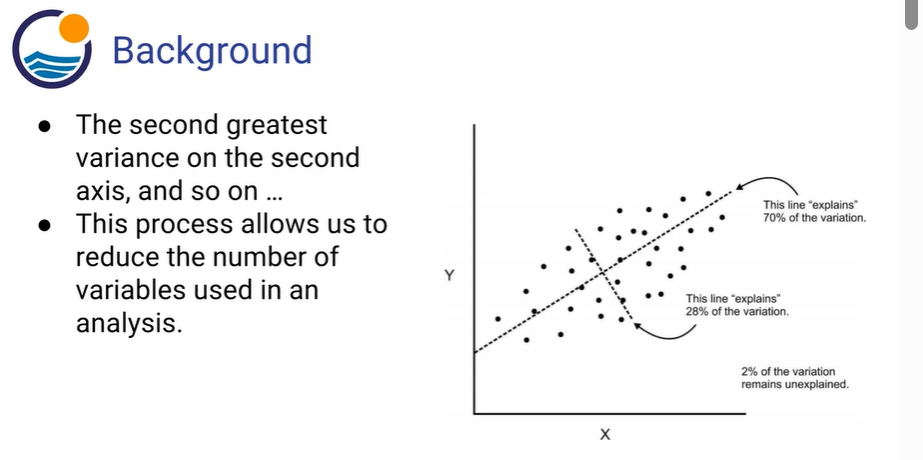

Note the above componenets are uncorrelated, since in the sample space they are orthogonal to each other.

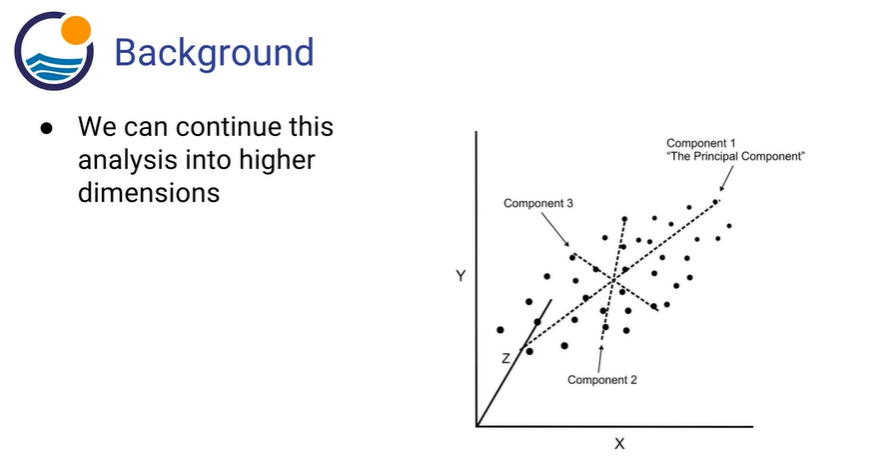

We usually want to standardize our data. Also with PCA, this algorithm is usually used for data analysis and not a fully deployable model.

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [101]:
# import dataset, load_ has many

from sklearn.datasets import load_breast_cancer

In [102]:
cancer = load_breast_cancer()

cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [104]:
# this object acts like adctionary, can call cancer.keys

type(cancer)

sklearn.utils._bunch.Bunch

In [106]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [105]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [108]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [109]:
# look at the target

cancer['target']

# cancer['target_names']     =malignant or benign

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [111]:
# import scaler to scale data.. 30 variables (columns) are too many
# scale it so each feature has a single unit variance before we use PCA

from sklearn.preprocessing import StandardScaler

# object of standard scaler
scaler = StandardScaler()

# then fit it to dataframe features
scaler.fit(df)

StandardScaler()

In [112]:
# transform data
# create object

scaled_data = scaler.transform(df)

In [ ]:
# instantiate a PCA object
# find Principal component using FIT method
# apply rotation and dimensionality reduction by calling transform



In [113]:
# import PCA

from sklearn.decomposition import PCA

In [114]:
# object of it 
# specify the number of components we want to keep
pca = PCA(n_components=2)

In [115]:
# fit to scaled data
pca.fit(scaled_data)

PCA(n_components=2)

In [116]:
# transform data to first principal components

x_pca = pca.transform(scaled_data)

In [117]:
scaled_data.shape

(569, 30)

In [118]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

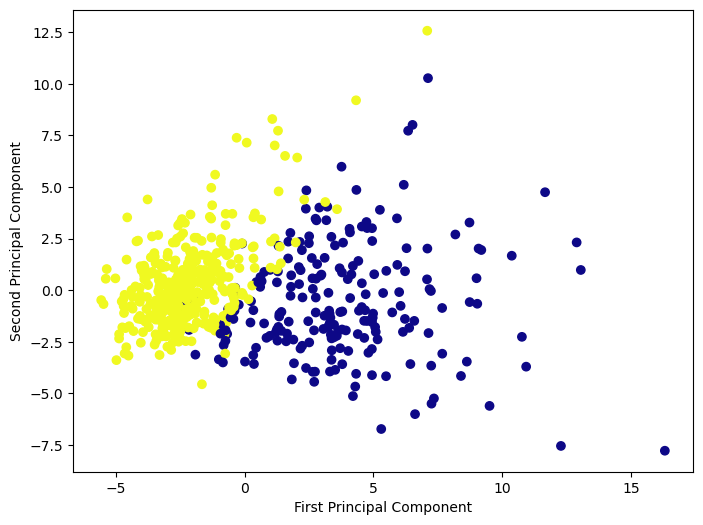

In [120]:
# 2 dimnesion now, can plot the figure


plt.figure(figsize=(8,6))

# make scatter plot of these two columns in x_pca
# these are numpy arrays
# grab all rows of column 0 to plot those against all rows in column 1
# color it by 'target'
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

The components above don't relate 1 to 1 to specific featuers in your data. They components coorespond to combinations of the orignal features. the components are stored as attributes of the orignal PCA object

In [121]:
# an array of numpy matrix array of components
# each row represents a prinipal component
# each column relates back to original features

pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [122]:
# we can visualize the relationship with the components with a heat map
# pass in pca.components

df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])

In [123]:
df_comp

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.218902      0.103725        0.227537   0.220995         0.142590   
1    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.239285        0.258400             0.260854       0.138167   
1          0.151892        0.060165            -0.034768       0.190349   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.064363  ...      0.227997       0.104469         0.236640   
1                0.366575  ...     -0.219866      -0.045467        -0.199878   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.224871          0.127953           0.210096         0.228768   
1   -0.219352          0.172304           0.143593         0.097964   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.250886        0.122905                 0.131784  
1             -0.008257        0.141883                 0.275339  

[2 rows x 30 columns]

<Axes: >

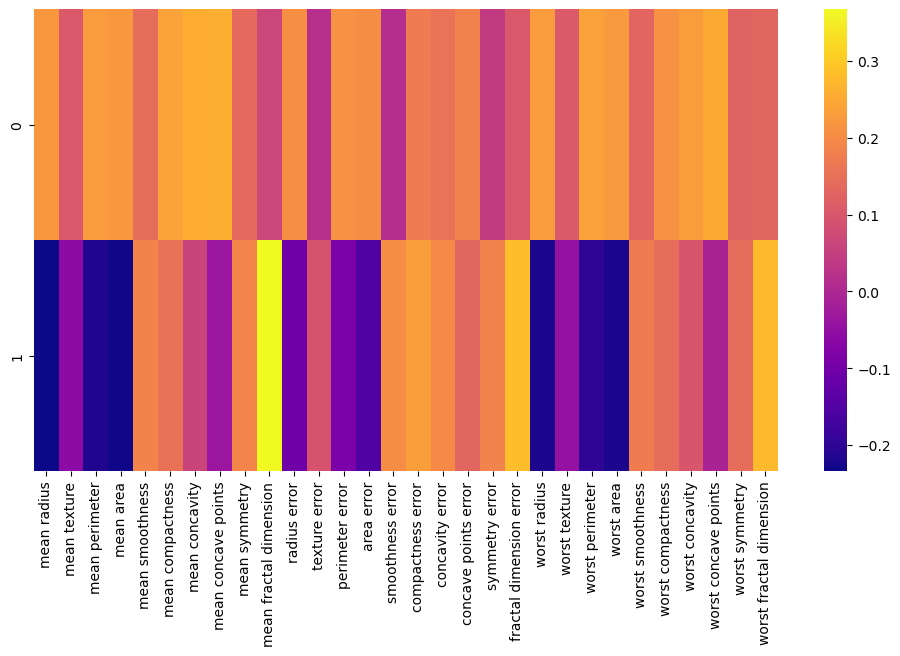

In [125]:
# pass that in to heat map

# make it a little bigger with figsize
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')

Show the relationships between the coorleation of the features and the components themselves.